In [2]:
import os
os.chdir('../')
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from redunet import ReduNetVector
import utils_example as ue

ModuleNotFoundError: No module named 'redunet'

In [20]:
import sys
sys.path.append("..")
from datasets import mnist

## Hyperparameters

In [11]:
## Data
dataset = 8  # can be 1 to 8
train_noise = 0.2
test_noise = 0.2
train_samples = 100
test_samples = 100

## Model
num_layers = 600  # number of redunet layers
eta = 0.5
eps = 0.1
lmbda = 200

## Data

In [5]:
X_train, y_train, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
#X_train2, y_train2, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
X_test, y_test, num_classes = ue.generate_2d(dataset, test_noise, test_samples) # test
print(X_train.shape)
print(y_train.shape)
#print(y_train)

torch.Size([600, 2])
torch.Size([600])


## Model

In [12]:
net = ReduNetVector(num_classes, num_layers, X_train.shape[1], eta=eta, eps=eps, lmbda=lmbda)
Z_train = net.init(X_train, y_train)

0 | 0.737473 2.375468 1.637995
1 | 0.738711 2.375484 1.636774
2 | 0.739949 2.375501 1.635553
3 | 0.741187 2.375519 1.634332
4 | 0.742973 2.375536 1.632563
5 | 0.744222 2.375554 1.631332
6 | 0.745471 2.375573 1.630102
7 | 0.747054 2.375591 1.628537
8 | 0.748310 2.375610 1.627301
9 | 0.749564 2.375629 1.626065
10 | 0.750817 2.375648 1.624831
11 | 0.752069 2.375669 1.623600
12 | 0.753318 2.375689 1.622370
13 | 0.754585 2.375709 1.621124
14 | 0.755829 2.375730 1.619901
15 | 0.757088 2.375751 1.618663
16 | 0.758942 2.375772 1.616830
17 | 0.760189 2.375794 1.615605
18 | 0.761431 2.375816 1.614385
19 | 0.762669 2.375838 1.613168
20 | 0.763904 2.375860 1.611956
21 | 0.765152 2.375883 1.610731
22 | 0.766376 2.375906 1.609530
23 | 0.767596 2.375929 1.608333
24 | 0.768811 2.375953 1.607142
25 | 0.770020 2.375977 1.605957
26 | 0.771223 2.376001 1.604779
27 | 0.772419 2.376025 1.603606
28 | 0.773610 2.376050 1.602441
29 | 0.772829 2.376075 1.603246
30 | 0.771925 2.376101 1.604175
31 | 0.771539 2.37

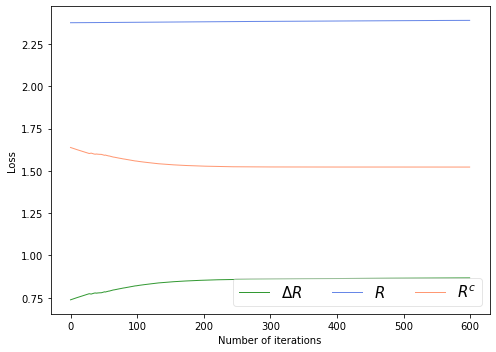

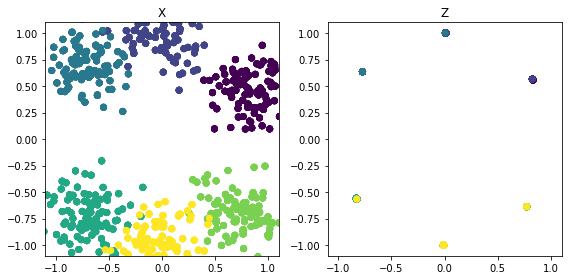

In [13]:
ue.plot_loss_mcr(net.get_loss())
ue.plot_2d(X_train, y_train, Z_train)  

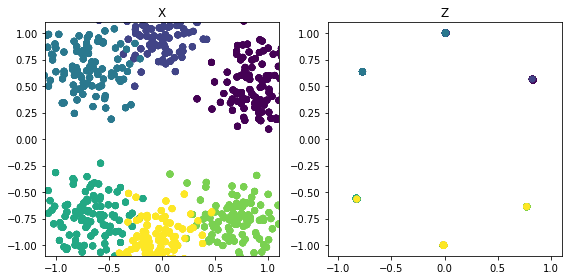

In [14]:
Z_test = net(X_test).detach()
ue.plot_2d(X_test, y_test, Z_test)

# TEST SECTION

In [10]:
centers = [[0,1],[1,0]]
for a,b in enumerate(centers):
    print(a)
    print(b)

0
[0, 1]
1
[1, 0]


In [37]:
targets = []
y = np.repeat(2, 9).tolist()
print(y)
for i in range(2):
    targets += y
print(targets)

[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [64]:
center1 =  (1, 0)
center2 =  (0, 1)
samples = 100
noise = 0.2
inputs = np.random.normal(loc=center1, scale=noise, size=(samples, 2))
inputs = inputs / np.linalg.norm(inputs, axis=1, ord=2, keepdims=True)
outputs = np.random.normal(loc=center2, scale=noise, size=(samples, 2))

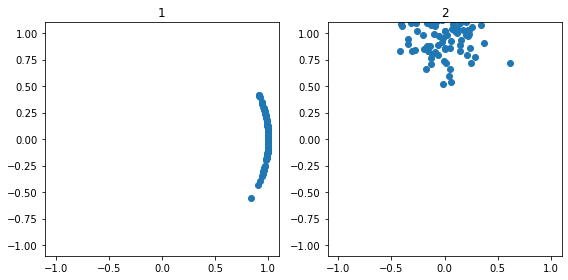

In [65]:

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

ax[0].scatter(inputs[:, 0], inputs[:, 1])
ax[0].set_ylim([-1.1, 1.1])
ax[0].set_xlim([-1.1, 1.1])
ax[0].set_title('1')

ax[1].scatter(outputs[:, 0], outputs[:, 1])
ax[1].set_ylim([-1.1, 1.1])
ax[1].set_xlim([-1.1, 1.1])
ax[1].set_title('2')
fig.tight_layout()
plt.show()
plt.close() 

Minist Example

In [24]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [25]:
    trainset, testset, num_classes = mnist.mnist2d_5class('./data/minst2d_5class')
    trainloader  = DataLoader(trainset, batch_size=trainset.data.shape[0])
    print(trainset)
    print(testset)
    print(num_classes)

Dataset MNIST
    Number of datapoints: 30596
    Root location: ./data/minst2d_5class
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 5139
    Root location: ./data/minst2d_5class
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )
5


# Training

In [30]:
import argparse
import os

import torch
import torch.nn as nn


from redunet import *
import evaluate
import load as L
import functional as F
import utils
import plot

In [50]:

save_dir = "../mnist2d_result"
data = "./data/minst2d_5class"
data_dir = "./data/minst2d_5class"
arch = "layers50"
samples = "1000"
tail = 'non'

In [46]:
## CUDA
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## Model Directory
model_dir = os.path.join(save_dir, 
                         'forward',
                         f'{data}+{arch}',
                         f'samples{samples}'
                         f'{tail}')
os.makedirs(model_dir, exist_ok=True)
utils.save_params(model_dir, "test")
print(model_dir)



../mnist2d_result\forward\./data/minst2d_5class+layers50\samples1000non


In [55]:
## Data
trainset, testset, num_classes = L.load_dataset(data, data_dir = data_dir='./data/')
X_train, y_train = F.get_samples(trainset, samples)
X_train, y_train = X_train.to(device), y_train.to(device)

## Architecture
net = L.load_architecture(args.data, args.arch)
net = net.to(device)

NameError: Dataset ./data/minst2d_5class not found.

In [ ]:
## Training
with torch.no_grad():
    Z_train = net.init(X_train, y_train)
    losses_train = net.get_loss()
    X_train, Z_train = F.to_cpu(X_train, Z_train)

## Saving
utils.save_loss(model_dir, 'train', losses_train)
utils.save_ckpt(model_dir, 'model', net)

## Plotting
plot.plot_loss_mcr(model_dir, 'train')

print(model_dir)